<a href="https://colab.research.google.com/github/rufusclieve/MEDICAL-INSURANCE-COST-PREDICTION/blob/main/Project_4_Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Importing Dataset**

In [2]:
insurance = pd.read_csv('/content/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Analysis**

In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Here, It will not show the Describe for column smoker, region, sex as there are categorical data (objects).

In [7]:
# let describe our dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-9-fddd616b8188>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

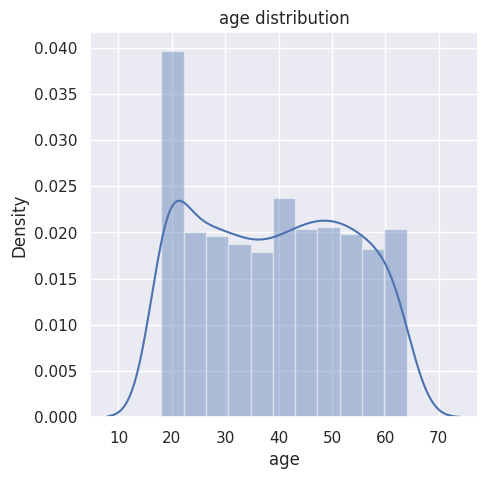

In [9]:
# lets plot the graphy for single column and analysis the dataset
# distrubition of age
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance['age'])
plt.title('age distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

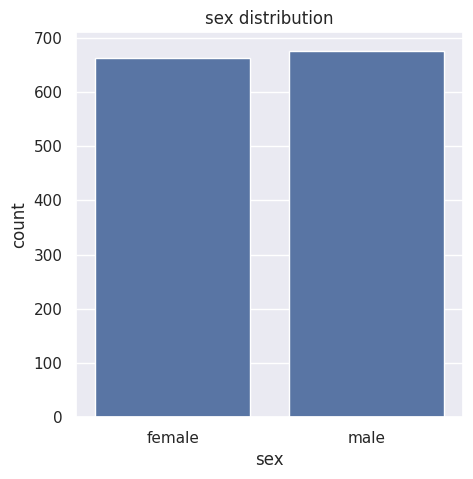

In [11]:
# lets check the distribution for categorical data sex
#sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex', data = insurance)
plt.title('sex distribution')
plt.show

In [14]:
#another way to check the distribution of counts btw both the column
insurance['sex'].value_counts()

,count
sex,
male,676
female,662


### BMI represents BODY MASS INDEX
### range - 18.5 to 24.9

### By seeing the graphy we can understand most of the person are over weight as many are above 24.9

<ipython-input-15-fb8fd01de167>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

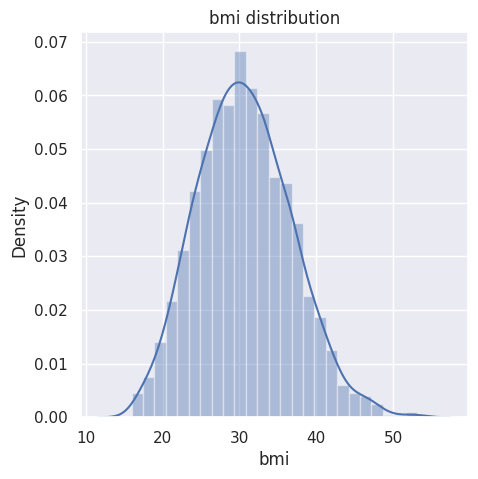

In [15]:
# checking for bmi distribution
plt.figure(figsize=(5,5))
sns.distplot(insurance['bmi'])
plt.title('bmi distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

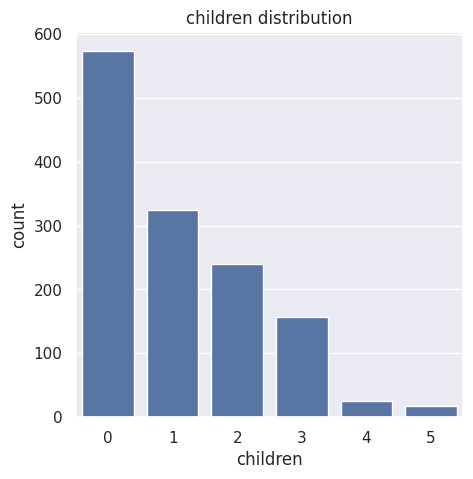

In [17]:
# checking for children
plt.figure(figsize=(5,5))
sns.countplot(x = 'children', data = insurance)
plt.title('children distribution')
plt.show

In [18]:
insurance['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<function matplotlib.pyplot.show(close=None, block=None)>

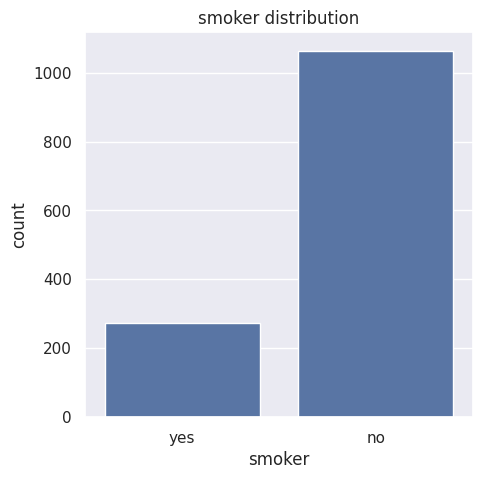

In [19]:
# smoker
plt.figure(figsize=(5,5))
sns.countplot(x = 'smoker', data = insurance)
plt.title('smoker distribution')
plt.show

In [20]:
insurance['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<function matplotlib.pyplot.show(close=None, block=None)>

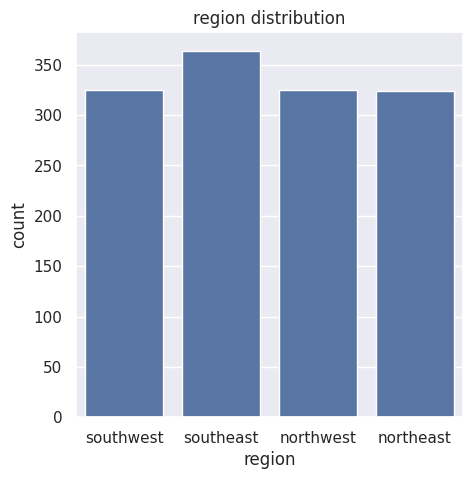

In [21]:
# region
plt.figure(figsize=(5,5))
sns.countplot(x = 'region', data = insurance)
plt.title('region distribution')
plt.show

In [22]:
insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-23-f61a32aeb0f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<function matplotlib.pyplot.show(close=None, block=None)>

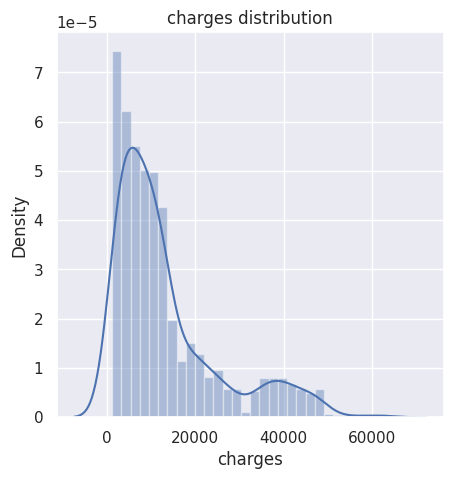

In [23]:
#charges
plt.figure(figsize=(5,5))
sns.distplot(insurance['charges'])
plt.title('charges distribution')
plt.show

# **Data PreProcessing**

In [27]:
# changing the categorical data to numeric  0 and 1
# for sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)


# for smoker column
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)


# for region column
insurance.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3 }}, inplace=True)

In [28]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [29]:
x = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [30]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [31]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [32]:
# splitting data to train and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model - Linear Regression
1. Y = target or prediction features
2. x = features
3. m = slope
4. c = intercept

Y = MX+C

In [35]:
# Model Training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
#Evaluation the model
training_data_prediction = lr.predict(x_train)

In [39]:
# R square error
r2_train  = metrics.r2_score(y_train, training_data_prediction)
print('R squared error : ', r2_train)


R squared error :  0.7518195459072954


In [40]:
#Evaluation the model
test_data_prediction = lr.predict(x_test)

In [41]:
# R square error
r2_test  = metrics.r2_score(y_test, test_data_prediction)
print('R squared error : ', r2_test)

R squared error :  0.7454471618659976


# **BUILDING A PREDICTIVE SYSTEM**

In [48]:
inpu_data = (62,1,26.29,0,0,0)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(inpu_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
#print(prediction)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  35527.17567083341


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
